# Ejercicio 1

- Daniel Menendez 
- Celeste Gallardo
- Jesua Villacis

In [ ]:
import numpy as np
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display

# Puntos fijos
p1 = (5.4, 3.2)
p3 = (12.3, -3.6)

def ajustar_minimos_cuadrados(puntos):
    """
    Ajusta una parábola y = ax² + bx + c por mínimos cuadrados
    a una lista de puntos [(x1, y1), (x2, y2), (x3, y3)]
    """
    x_vals = np.array([p[0] for p in puntos])
    y_vals = np.array([p[1] for p in puntos])

    # Matriz del sistema Ax = y para mínimos cuadrados
    A = np.vstack([x_vals**2, x_vals, np.ones(len(x_vals))]).T
    coeficientes = np.linalg.lstsq(A, y_vals, rcond=None)[0]  # a, b, c
    return coeficientes

def actualizar(px, py):
    p2 = (px, py)
    puntos = [p1, p2, p3]
    
    # Ajustar la parábola con mínimos cuadrados
    a, b, c = ajustar_minimos_cuadrados(puntos)
    
    # Evaluar función cuadrática
    x = np.linspace(4, 14, 400)
    y = a * x**2 + b * x + c

    # Crear figura
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Ajuste cuadrático'))
    
    # Dibujar los puntos
    fig.add_trace(go.Scatter(
        x=[p[0] for p in puntos],
        y=[p[1] for p in puntos],
        mode='markers+text',
        text=['p1', 'p2 (movible)', 'p3'],
        textposition='top center',
        marker=dict(size=10, color='red')
    ))

    # Mostrar coeficientes
    fig.update_layout(
        title=f'Parábola por mínimos cuadrados<br>a={a:.3f}, b={b:.3f}, c={c:.3f}',
        xaxis_title='x', yaxis_title='y',
        width=700, height=500
    )
    fig.show()

# Sliders para mover p2
x_slider = widgets.FloatSlider(value=9.5, min=4, max=14, step=0.1, description='x₂')
y_slider = widgets.FloatSlider(value=0.7, min=-6, max=6, step=0.1, description='y₂')

widgets.interact(actualizar, px=x_slider, py=y_slider)


interactive(children=(FloatSlider(value=9.5, description='x₂', max=14.0, min=4.0), FloatSlider(value=0.7, desc…

<function __main__.actualizar(px, py)>

# Prueba ejercicio 1

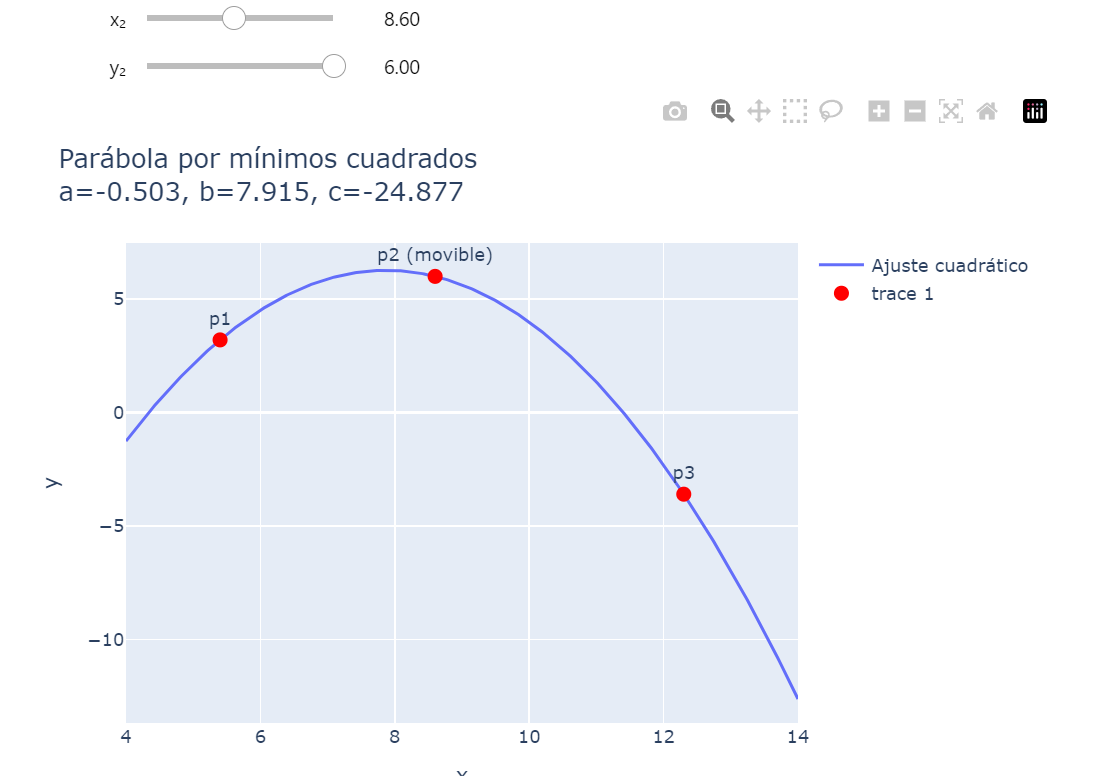